In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

# Load the data
data = pd.read_csv("C:/Users/PoojaLocal/Downloads/PythonPortfolio/TelecomCustomer.csv")

# Display the first few rows and basic information
print(data.head())
print(data.info())

# Check for missing values
print(data.isnull().sum())

# Display summary statistics
print(data.describe())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [3]:
# Data Processing
# Convert 'TotalCharges' to numeric, replacing empty strings with NaN
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Handle missing values
data['TotalCharges'].fillna(data['TotalCharges'].mean(), inplace=True)

# Convert categorical variables to numeric
categorical_columns = data.select_dtypes(include=['object']).columns
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Separate features and target variable
X = data.drop('Churn_Yes', axis=1)
y = data['Churn_Yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

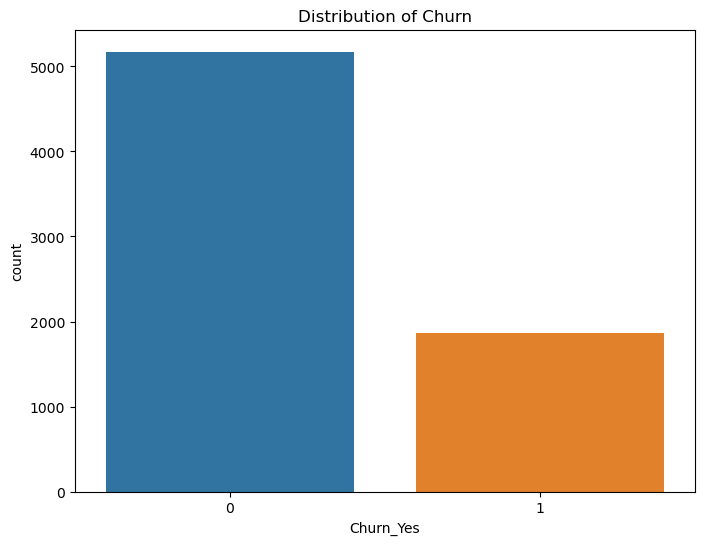

In [4]:
#Exploratory Data Analysis (EDA):
# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn_Yes', data=data)
plt.title('Distribution of Churn')
plt.show()

In [8]:
# Build and Train the Model:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)



LogisticRegression(random_state=42)

In [9]:
# Make predictions on the entire test set
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]



In [10]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[992  44]
 [257 116]]


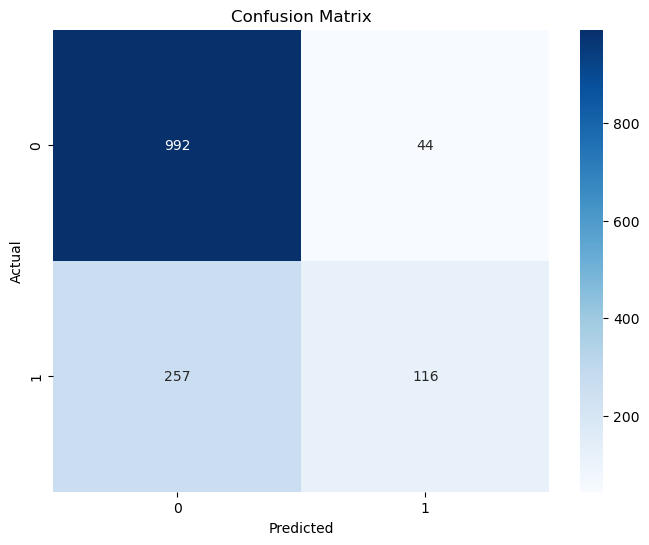

In [11]:
# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



In [12]:
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))




Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.96      0.87      1036
           1       0.72      0.31      0.44       373

    accuracy                           0.79      1409
   macro avg       0.76      0.63      0.65      1409
weighted avg       0.78      0.79      0.75      1409



In [13]:
# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nROC AUC Score: {roc_auc:.4f}")


ROC AUC Score: 0.8567


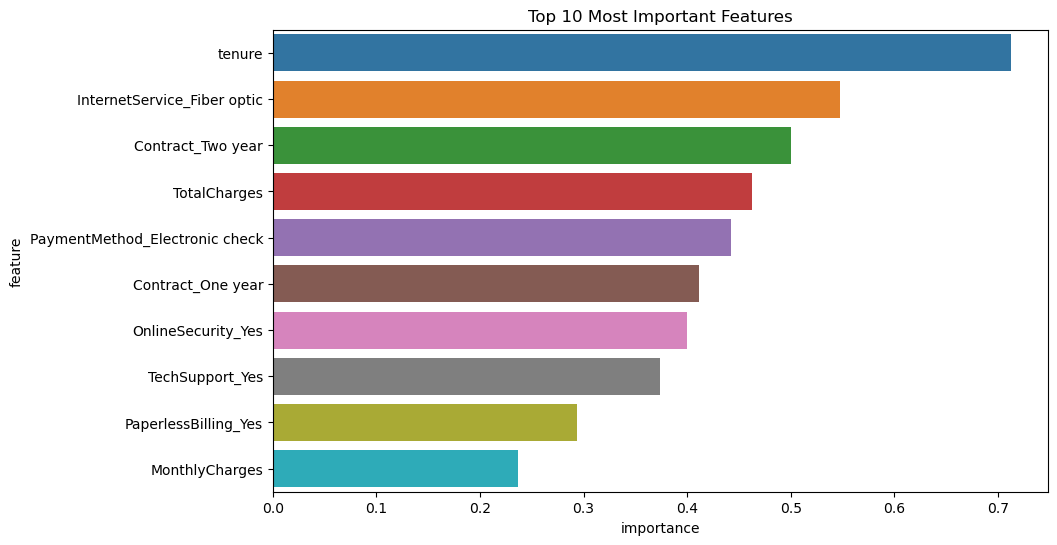

In [14]:
# Feature Importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': abs(model.coef_[0])
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Most Important Features')
plt.show()

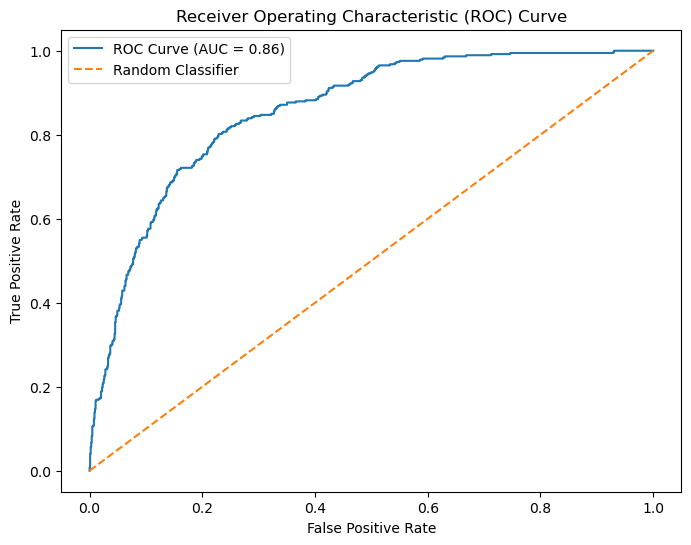

In [15]:
# ROC Curve
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [18]:
#Cross-Validation:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV score: {cv_scores.mean():.4f}")

Cross-validation scores: [0.77905945 0.7755102  0.76663709 0.7755102  0.77353464]
Mean CV score: 0.7741


In [30]:
print(f"Number of samples: {X_train_scaled.shape[0]}")
print(f"Number of features: {X_train_scaled.shape[1]}")

Number of samples: 5634
Number of features: 7072


In [31]:
from sklearn.feature_selection import VarianceThreshold

# Remove constant features
selector = VarianceThreshold()
X_train_var = selector.fit_transform(X_train_scaled)
X_test_var = selector.transform(X_test_scaled)

print(f"Number of features after removing constants: {X_train_var.shape[1]}")



Number of features after removing constants: 5663


In [32]:
# Then proceed with SelectKBest
selector = SelectKBest(f_classif, k=100)
X_train_reduced = selector.fit_transform(X_train_var, y_train)
X_test_reduced = selector.transform(X_test_var)

print(f"Final number of features: {X_train_reduced.shape[1]}")

Final number of features: 100


In [33]:
#Simplified Model Training:
#Train a basic logistic regression model- the reduced feature set

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

model = LogisticRegression(random_state=42)
model.fit(X_train_reduced, y_train)

y_pred = model.predict(X_test_reduced)
y_pred_proba = model.predict_proba(X_test_reduced)[:, 1]

print(classification_report(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1036
           1       0.69      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409

ROC AUC Score: 0.8618


In [34]:
#Quick Hyperparameter Tuning:
#Use a smaller parameter grid and fewer iterations for RandomizedSearchCV.

from sklearn.model_selection import RandomizedSearchCV

param_distributions = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear']
}

random_search = RandomizedSearchCV(LogisticRegression(random_state=42), 
                                   param_distributions, 
                                   n_iter=3,  # reduced number of iterations
                                   cv=3,  # reduced number of folds
                                   scoring='roc_auc',
                                   random_state=42)
random_search.fit(X_train_reduced, y_train)

print("Best parameters:", random_search.best_params_)
print("Best ROC AUC score:", random_search.best_score_)



Best parameters: {'solver': 'liblinear', 'penalty': 'l2', 'C': 10}
Best ROC AUC score: 0.8474691769117518


In [35]:
# Train final model with best parameters
best_model = random_search.best_estimator_
best_model.fit(X_train_reduced, y_train)

LogisticRegression(C=10, random_state=42, solver='liblinear')

In [36]:
#Model Evaluation:
#Evaluate the final model on the test set

y_pred = best_model.predict(X_test_reduced)
y_pred_proba = best_model.predict_proba(X_test_reduced)[:, 1]

print(classification_report(y_test, y_pred))
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")

              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1036
           1       0.69      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409

ROC AUC Score: 0.8618


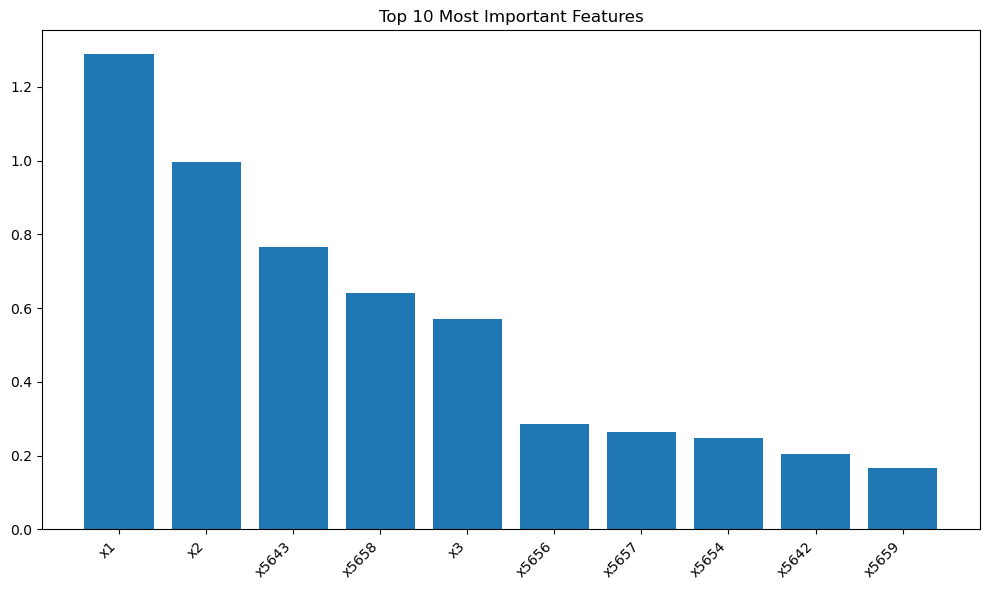

In [37]:
# Feature Importance: Identify the most important features

import pandas as pd
import matplotlib.pyplot as plt

feature_importance = pd.DataFrame({
    'feature': selector.get_feature_names_out(),
    'importance': abs(best_model.coef_[0])
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'][:10], feature_importance['importance'][:10])
plt.title('Top 10 Most Important Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()